# Clustering with Python

In [278]:
# load packages
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import tree
from IPython.display import Image
import numpy as np
import os
import shutil

In [279]:
# read in data
df = pd.read_csv('/Users/brianwimmer/anly-501-project-brianwimmer-gu/data/April_2020_VA_Flights.csv')

In [280]:
# view airline codes for filtering
df['OP_CARRIER'].unique()

# Use UA, DL, WN (Southwest), AA, F9 (Frontier) for clustering

array(['OH', 'OO', 'UA', 'AA', 'B6', 'DL', 'WN', 'G4', 'MQ', '9E', 'AS',
       'EV', 'F9', 'YX', 'NK', 'YV'], dtype=object)

In [281]:
# Data Cleaning
# remove unnecessary columns
df = df.drop(['YEAR', 'MONTH', 'ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID'], axis=1)

# filter out only IAD AND DCA flights
originList = ["IAD", "DCA"]
df = df[df['ORIGIN'].isin(originList)]

# filter out only cancelled flights
df = df[df['CANCELLED'] == 1]

# filter out only legacy carrier flights (UA, DL, AA) and Southwest (WN)
carriers = ["UA","DL", "AA", "WN"]
df = df[df["OP_CARRIER"].isin(carriers)]

# remove unnecessary columns
df = df.drop(['CANCELLED'], axis=1)

# dummy variables for destination and origin
df = pd.get_dummies(df, columns=['DEST', 'ORIGIN'])

In [282]:
# CODE TO EXPLORE THE LOAD BALANCE AND COUNT THE NUMBER OF 
# SAMPLES FOR EACH TARGET (EVEN THOUGH TARGET WILL NOT BE USED)

print('Number of points with carrier = UA (UNITED): ', len(df[df['OP_CARRIER']=='UA']), round(len(df[df['OP_CARRIER']=='UA']) / len(df)*100), '%')
print('Number of points with carrier = DL (DELTA): ', len(df[df['OP_CARRIER']=='DL']), round(len(df[df['OP_CARRIER']=='DL']) / len(df)*100), '%')
print('Number of points with carrier = AA (AMERICAN): ', len(df[df['OP_CARRIER']=='AA']), round(len(df[df['OP_CARRIER']=='AA']) / len(df)*100), '%')
print('Number of points with carrier = WN (SOUTHWEST): ', len(df[df['OP_CARRIER']=='WN']), round(len(df[df['OP_CARRIER']=='WN']) / len(df)*100), '%')

Number of points with carrier = UA (UNITED):  610 34 %
Number of points with carrier = DL (DELTA):  115 6 %
Number of points with carrier = AA (AMERICAN):  469 26 %
Number of points with carrier = WN (SOUTHWEST):  596 33 %


In [283]:
# convert OP_CARRIER to categorical codes
df['OP_CARRIER'] = df.OP_CARRIER.astype('category').cat.codes

# UA = 2, DL = 1, AA = 0, WN = 3

In [284]:
# Split the dataset in X and y. since this is unsupervised learning, we will not use the y labels. 
# Normalize the X data by using the StandardScaler function.
from sklearn.preprocessing import StandardScaler

X = df.drop('OP_CARRIER', axis = 1)
y = df['OP_CARRIER']

# normalizing data (all but dummies)
scaler = StandardScaler()
X = X.to_numpy()
X[:,:-47] = scaler.fit_transform(X[:,:-47])

In [285]:
# import libraries for clustering: KMeans, AgglomerativeClustering, and DBSCAN
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.spatial.distance import cdist

## Exploratory Data Analysis

<AxesSubplot:>

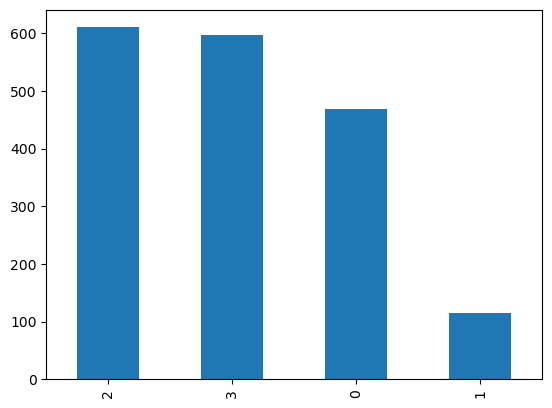

In [286]:
# plot number of penguins on each island
df['OP_CARRIER'].value_counts().plot(kind='bar')

## K-Means

In [287]:
# for k means clustering we will use the elbow method to find the optimal number of clusters. 
# we will use the inertia_ attribute to find the sum of squared distances of samples to their closest cluster center. 
# we will use the range of 1 to 10 clusters. plot the inertia_ values for each number of clusters. 
# make sure to save it in a dataframe and plot it using matplotlib.

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
  
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

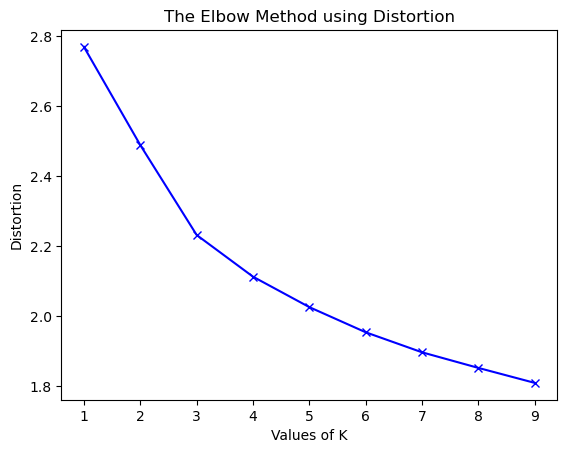

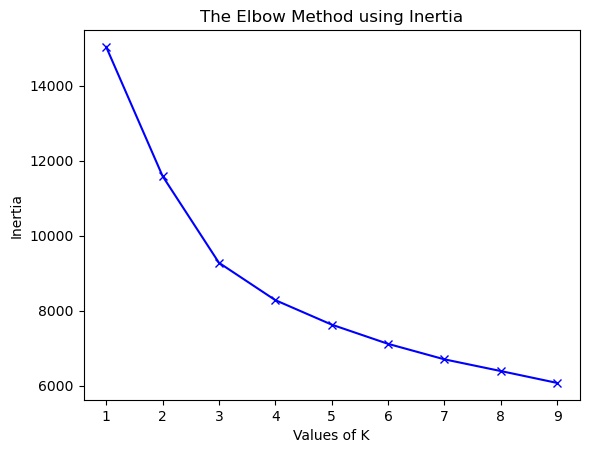

In [288]:
# plot distortion and inertia for kmeans, you can either plot them seperately or use fig, 
# ax = plt.subplots(1, 2) to plot them in the same figure. Suggest the optimal number of clusters based on the plot.
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

The optimal value of K would be 3 (at the elbow) using distortion and inertia.

Text(0.5, 1.0, 'K_Means')

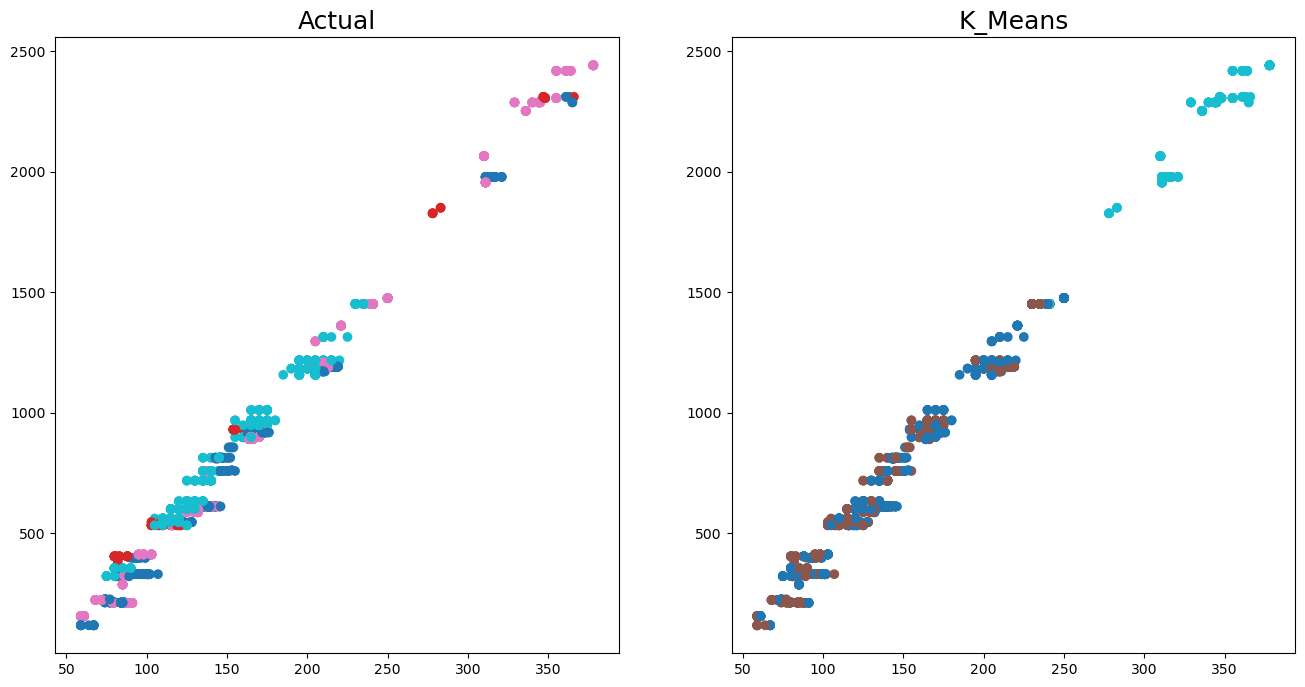

In [289]:
# 3 clusters

kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(X)

df_km = df.copy()
df_km['k_means'] = kmeanModel.predict(X)
df_km['target'] = df['OP_CARRIER']
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(df_km["CRS_ELAPSED_TIME"], df_km["DISTANCE"], c=df_km['target'], cmap=plt.cm.tab10)
axes[1].scatter(df_km["CRS_ELAPSED_TIME"], df_km["DISTANCE"], c=df_km['k_means'], cmap=plt.cm.tab10)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('K_Means', fontsize=18)

Text(0.5, 1.0, 'K_Means')

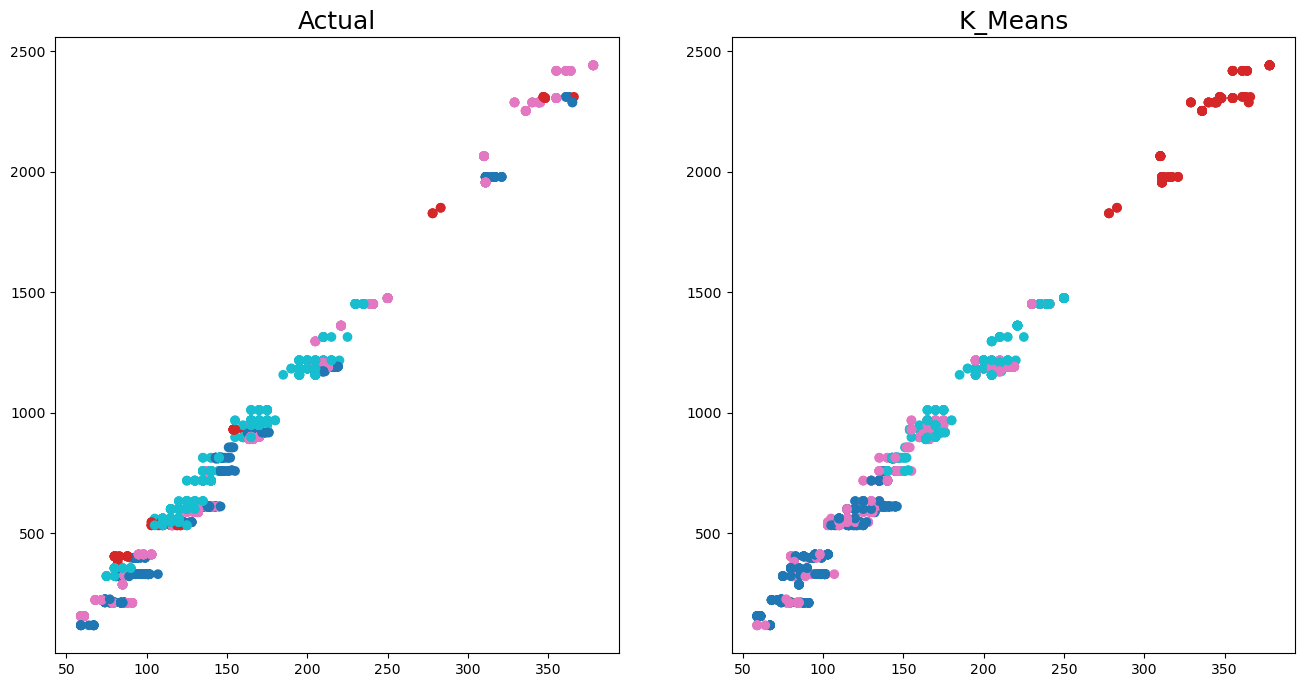

In [290]:
# 4 clusters

kmeanModel = KMeans(n_clusters=4)
kmeanModel.fit(X)

df_km = df.copy()
df_km['k_means'] = kmeanModel.predict(X)
df_km['target'] = df['OP_CARRIER']
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(df_km["CRS_ELAPSED_TIME"], df_km["DISTANCE"], c=df_km['target'], cmap=plt.cm.tab10)
axes[1].scatter(df_km["CRS_ELAPSED_TIME"], df_km["DISTANCE"], c=df_km['k_means'], cmap=plt.cm.tab10)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('K_Means', fontsize=18)

Text(0.5, 1.0, 'K_Means')

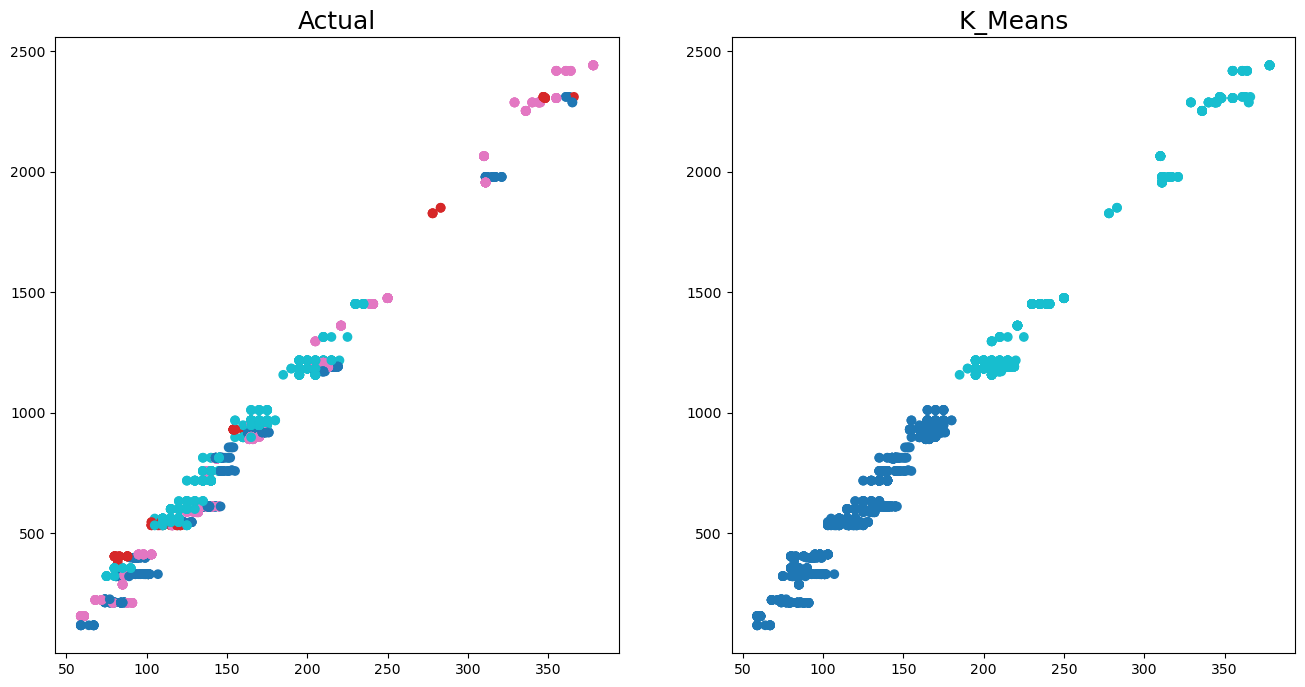

In [291]:
# 2 clusters

kmeanModel = KMeans(n_clusters=2)
kmeanModel.fit(X)

df_km = df.copy()
df_km['k_means'] = kmeanModel.predict(X)
df_km['target'] = df['OP_CARRIER']
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(df_km["CRS_ELAPSED_TIME"], df_km["DISTANCE"], c=df_km['target'], cmap=plt.cm.tab10)
axes[1].scatter(df_km["CRS_ELAPSED_TIME"], df_km["DISTANCE"], c=df_km['k_means'], cmap=plt.cm.tab10)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('K_Means', fontsize=18)

In [292]:
from sklearn import metrics

km2 = KMeans(n_clusters=2)
km2_model = km2.fit(X)
km2_labels = km2_model.labels_

km3 = KMeans(n_clusters=3)
km3_model = km3.fit(X)
km3_labels = km3_model.labels_

km4 = KMeans(n_clusters=4)
km4_model = km4.fit(X)
km4_labels = km4_model.labels_
print("2 Clusters Silhouette Score: ", metrics.silhouette_score(X, km2_labels, metric = 'euclidean'))
print("3 Clusters Silhouette Score: ", metrics.silhouette_score(X, km3_labels, metric = 'euclidean'))
print("4 Clusters Silhouette Score: ", metrics.silhouette_score(X, km4_labels, metric = 'euclidean'))

2 Clusters Silhouette Score:  0.23089043910762466
3 Clusters Silhouette Score:  0.22029594926746143
4 Clusters Silhouette Score:  0.19036288692020908


## DBSCAN

In [293]:
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors

# n_neighbors = 5 
X_neighbors = NearestNeighbors(n_neighbors=5).fit(X)

# Find the k-neighbors of a point
X_nb_dist, X_nb_index = X_neighbors.kneighbors(X)

# distances sorted in order (rows)
X_nb_dist_sorted = np.sort(X_nb_dist, axis=0)

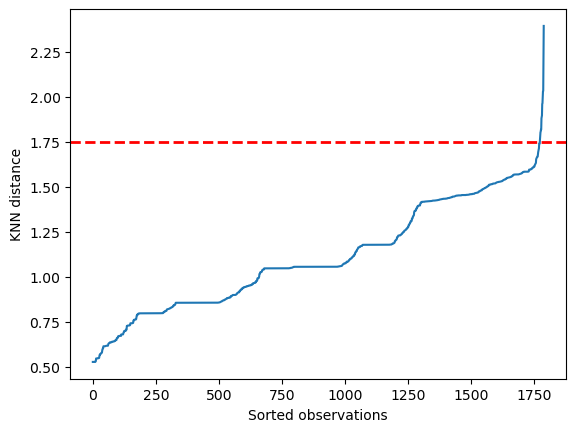

In [294]:
# KNN distance plot
k_dist = X_nb_dist_sorted[:, 4]
plt.plot(k_dist)
plt.axhline(y=1.75, linewidth=2, linestyle='dashed', color='r')
plt.ylabel("KNN distance")
plt.xlabel("Sorted observations")
plt.show()

In [295]:
# minPts = 20, chose based on number of flights per airline

db = DBSCAN(eps=1.75, min_samples=20)
db.fit(X)

clusters = db.labels_

from collections import Counter
# count number of obs per cluster
Counter(db.labels_)

Counter({-1: 118, 0: 1572, 3: 38, 2: 36, 1: 26})

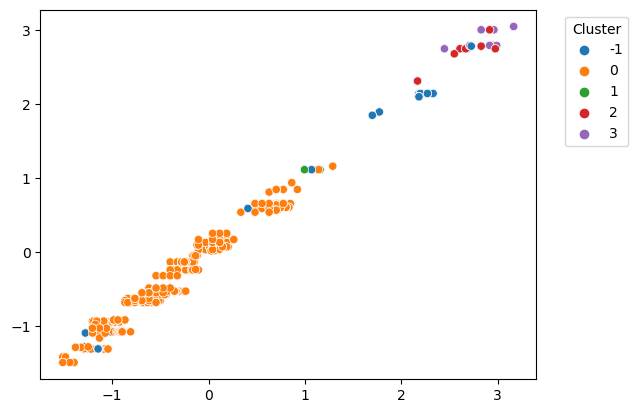

In [296]:
db_plot = sns.scatterplot(data=X, x=X[:,4], y=X[:,5], hue=clusters, legend="full", palette="tab10")
sns.move_legend(db_plot, "upper right", bbox_to_anchor=(1.2,1), title='Cluster')
plt.show()

In [297]:
# minPts = 15, chose based on number of flights per airline

db = DBSCAN(eps=1.75, min_samples=15)
db.fit(X)

clusters = db.labels_

from collections import Counter
# count number of obs per cluster
Counter(db.labels_)

Counter({0: 1643, -1: 49, 1: 57, 2: 41})

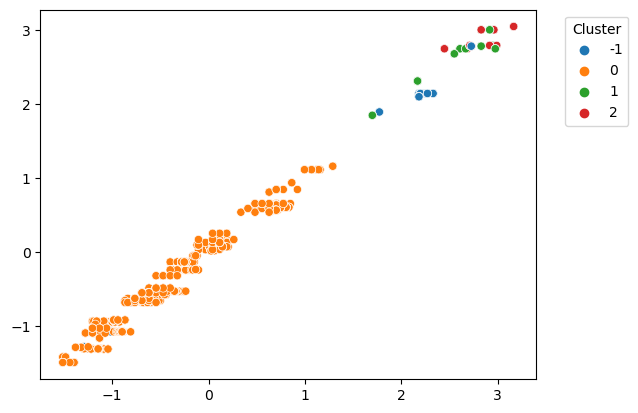

In [298]:
#plt.scatter(X[:,4], X[:,5], c=clusters, cmap=plt.cm.tab10)

db_plot = sns.scatterplot(data=X, x=X[:,4], y=X[:,5], hue=clusters, legend="full", palette="tab10")
sns.move_legend(db_plot, "upper right", bbox_to_anchor=(1.2,1), title='Cluster')
plt.show()

## Hierarchial Clustering

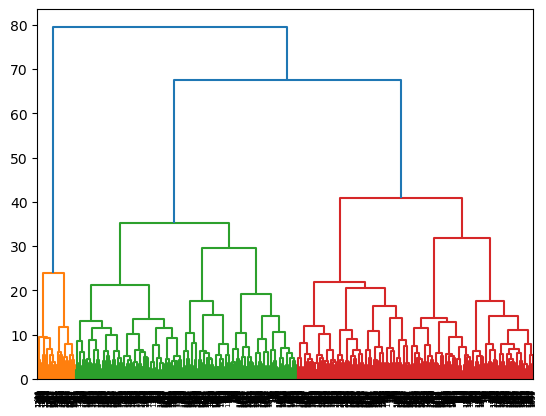

In [302]:
from scipy.cluster.hierarchy import dendrogram, linkage

# generate the linkage between points
hc_linkage = linkage(X, method='ward', metric='euclidean')

# visualize the linkage as a dendrogram
dendrogram(hc_linkage)
plt.show()

In [303]:
# 3 clusters

hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
hc_clusters = hc.fit_predict(X)

# count number of obs per cluster
Counter(hc_clusters)

Counter({0: 852, 2: 799, 1: 139})

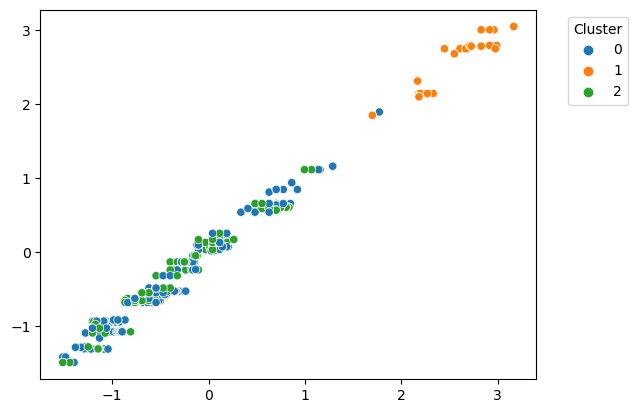

In [304]:
hc_plot = sns.scatterplot(data=X, x=X[:,4], y=X[:,5], hue=hc_clusters, legend="full", palette="tab10")
sns.move_legend(hc_plot, "upper right", bbox_to_anchor=(1.2,1), title='Cluster')
plt.show()